In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
# Loss function : Log likelihood
def compute_loss(y, hx):
    return -np.mean(y * np.log(hx) + (1-y)* np.log(1-hx))

In [ ]:
# Gradient of the loss in Matrix form
# X.T means X transpose
# y.shape[0] means n - number of data points
def compute_gradient(X, y, hx):
    return np.dot(X.T , (hx - y))/ y.shape[0]

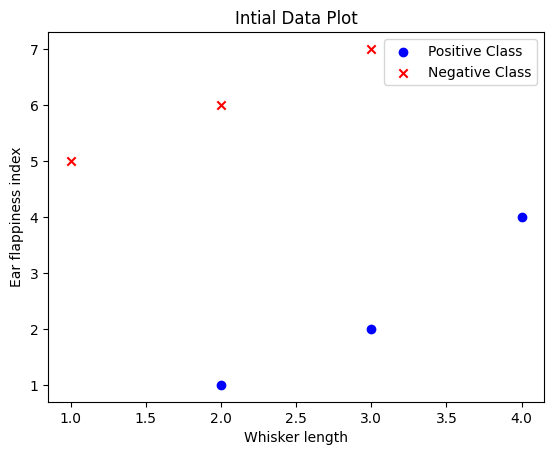

In [5]:
# Dataset
X = np.array([
    [2,1], [3,2], [4, 4],  # Positive Examples
    [1,5], [2, 6], [3, 7]  # Negative Examples
])

y = np.array([1, 1, 1, 0, 0, 0])  # Labels 

# Plot initial data
plt.scatter(X[:3, 0], X[:3, 1], color='blue', marker='o', label='Positive Class')
plt.scatter(X[3:, 0], X[3:, 1], color='red', marker='x', label='Negative Class')
plt.xlabel('Whisker length')
plt.ylabel('Ear flappiness index')
plt.legend()
plt.title('Intial Data Plot')
plt.show()
 

In [ ]:
# Logistic Regression Model
def logistic_regression(X, y, learning_rate=0.01, num_iterations=10):
    # Add intercept term of X
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Initialize weights
    weights = np.zeros(X.shape[1])

    # gradient descent
    for i in range(num_iterations):
        z = np.dot(X, weights)
        hx = sigmoid(z) # hypothesis
        loss = compute_loss(y, hx) # Loss function
        gradient = compute_gradient(X, y, hx) # gradient
        weights -=learning_rate * gradient

        plot_decision_boundary(X, y , weights, loss, i)
        print(f'Iteration {i}: Theta={weights}, Loss={loss}')
    
    return weights

In [ ]:
# Plotting the decision Boundary 
def plot_decision_boundary(X, y, weights, loss, iteration):
  plt.scatter(X[:3, 0], X[:3, 1], color='blue', marker='o', label='Positive Class' if iteration == 0 else "")
  plt.scatter(X[3:, 0], X[3:, 1], color='red', marker='x', label='Negative Class' if iteration == 0 else "")

  # Extend the x values a bit beyond the minimum and maximum values of the dataset
  x_values = np.array([np.min(X[:, 1]) - 1,  np.max(X[:, 1]) + 1])
  y_values = -(weights[0] + weights[1] * x_values) / weights[2]
  plt.plot(x_values, y_values, 'K')
  